### Medical Data Visualizer

C:\Users\yoge8\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


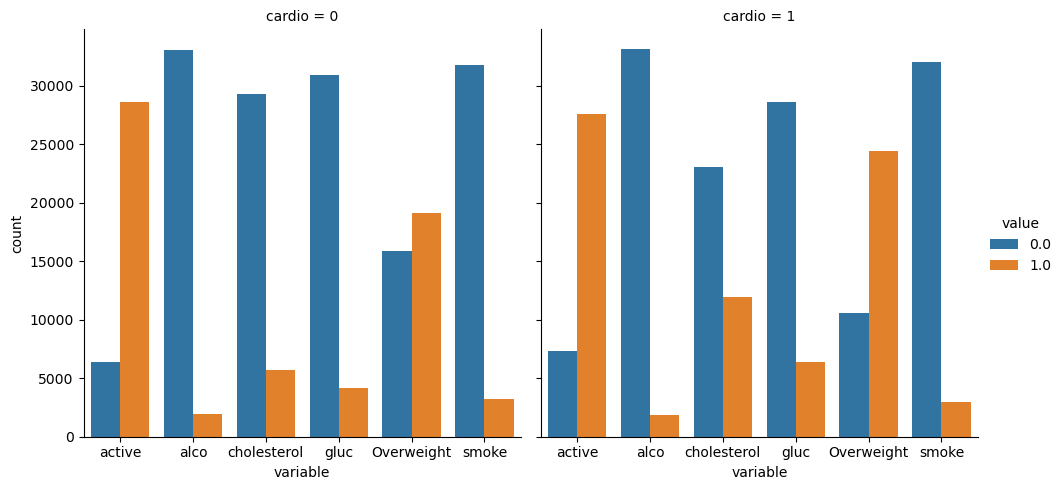

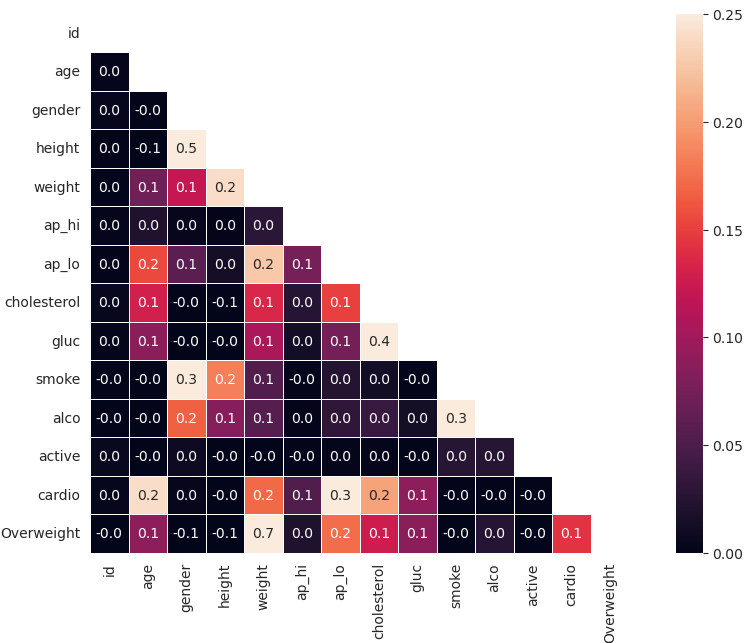

In [1]:
import numpy as np
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
df = pd.read_csv('medical_examination.csv')
Bmi = df['weight']/(np.square((df['height']/100)))
df.loc[Bmi < 25,'Overweight'] = 0
df.loc[Bmi > 25,'Overweight'] = 1
df.loc[df['cholesterol']==1,'cholesterol'] = 0
df.loc[df['cholesterol']>1,'cholesterol'] = 1
df.loc[df['gluc']==1,'gluc'] = 0
df.loc[df['gluc']>1,'gluc'] = 1
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','Overweight','smoke'])
df_filtered = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] < 
            df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] < 
            df['weight'].quantile(0.975))]
plot = se.catplot(x='variable',col='cardio',hue='value',kind='count',data=df_cat)
Corr = df_filtered.corr()
mask = np.zeros_like(Corr)
mask[np.triu_indices_from(mask)] = True
with se.axes_style("white"):
    f, fig = plt.subplots(figsize=(12, 7))
    fig = se.heatmap(Corr,vmin=0,vmax=.25,square=True,annot=True,linewidths=.5,fmt=".1f",mask=mask)